In [ ]:
!pip install scanpy
import scanpy as sc
adata = sc.datasets.pbmc3k()

print("Data shape:", adata.shape)
print("First few genes:")
print(adata.var_names[:5])
print("First few cells:")
print(adata.obs_names[:5])

Data shape: (2700, 32738)
First few genes:
Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8'], dtype='object', name='index')
First few cells:
Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1'],
      dtype='object', name='index')


In [ ]:
# 1. Filter genes and cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 2. Annotate mitochondrial gene content
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# 3. Filter cells based on quality
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

adata.obs.rename(columns={
    'total_counts': 'total_molecules',
    'n_genes_by_counts': 'genes_expressed',
    'pct_counts_mt': 'mito_percent'
}, inplace=True)

# Print preview
print("Preview of cell-level data (adata.obs):")
print(adata.obs[['total_molecules', 'genes_expressed', 'mito_percent']].head(10))

Preview of cell-level data (adata.obs):
                  total_molecules  genes_expressed  mito_percent
index                                                           
AAACATACAACCAC-1           2419.0              779      3.017776
AAACATTGAGCTAC-1           4903.0             1352      3.793596
AAACATTGATCAGC-1           3147.0             1129      0.889736
AAACCGTGCTTCCG-1           2639.0              960      1.743085
AAACCGTGTATGCG-1            980.0              521      1.224490
AAACGCACTGGTAC-1           2163.0              781      1.664355
AAACGCTGACCAGT-1           2175.0              782      3.816092
AAACGCTGGTTCTT-1           2260.0              790      3.097345
AAACGCTGTAGCCA-1           1275.0              532      1.176471
AAACGCTGTTTCTG-1           1103.0              550      2.901179


In [ ]:
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(adata, target_sum=1e4)

# Log-transform the data (adds 1 first to avoid log(0))
sc.pp.log1p(adata)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adata.var_names[:5]  # see first 5 gene names
adata.obs_names[:5]  # see first 5 cell names

Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1',
       'AAACCGTGCTTCCG-1', 'AAACCGTGTATGCG-1'],
      dtype='object', name='index')

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# Let's keep only the HVGs for downstream analysis
adata = adata[:, adata.var.highly_variable]


In [ ]:
sc.pp.regress_out(adata, ['total_molecules', 'mito_percent'])

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:729: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.scale(adata, max_value=10)


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')


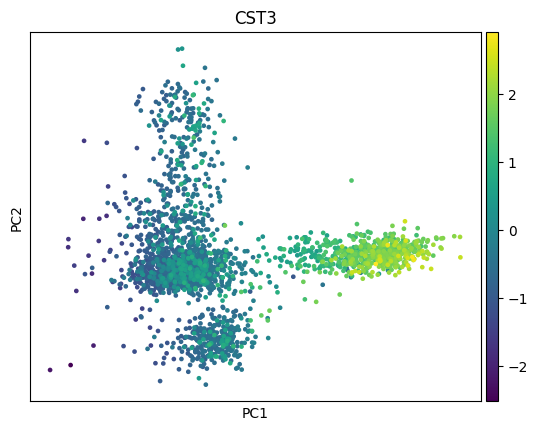

In [ ]:
sc.pl.pca(adata, color='CST3')  # Replace CST3 with a gene of interest if you'd like


In [ ]:
!pip install igraph leidenalg

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [ ]:
sc.tl.leiden(adata)


In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:482: 

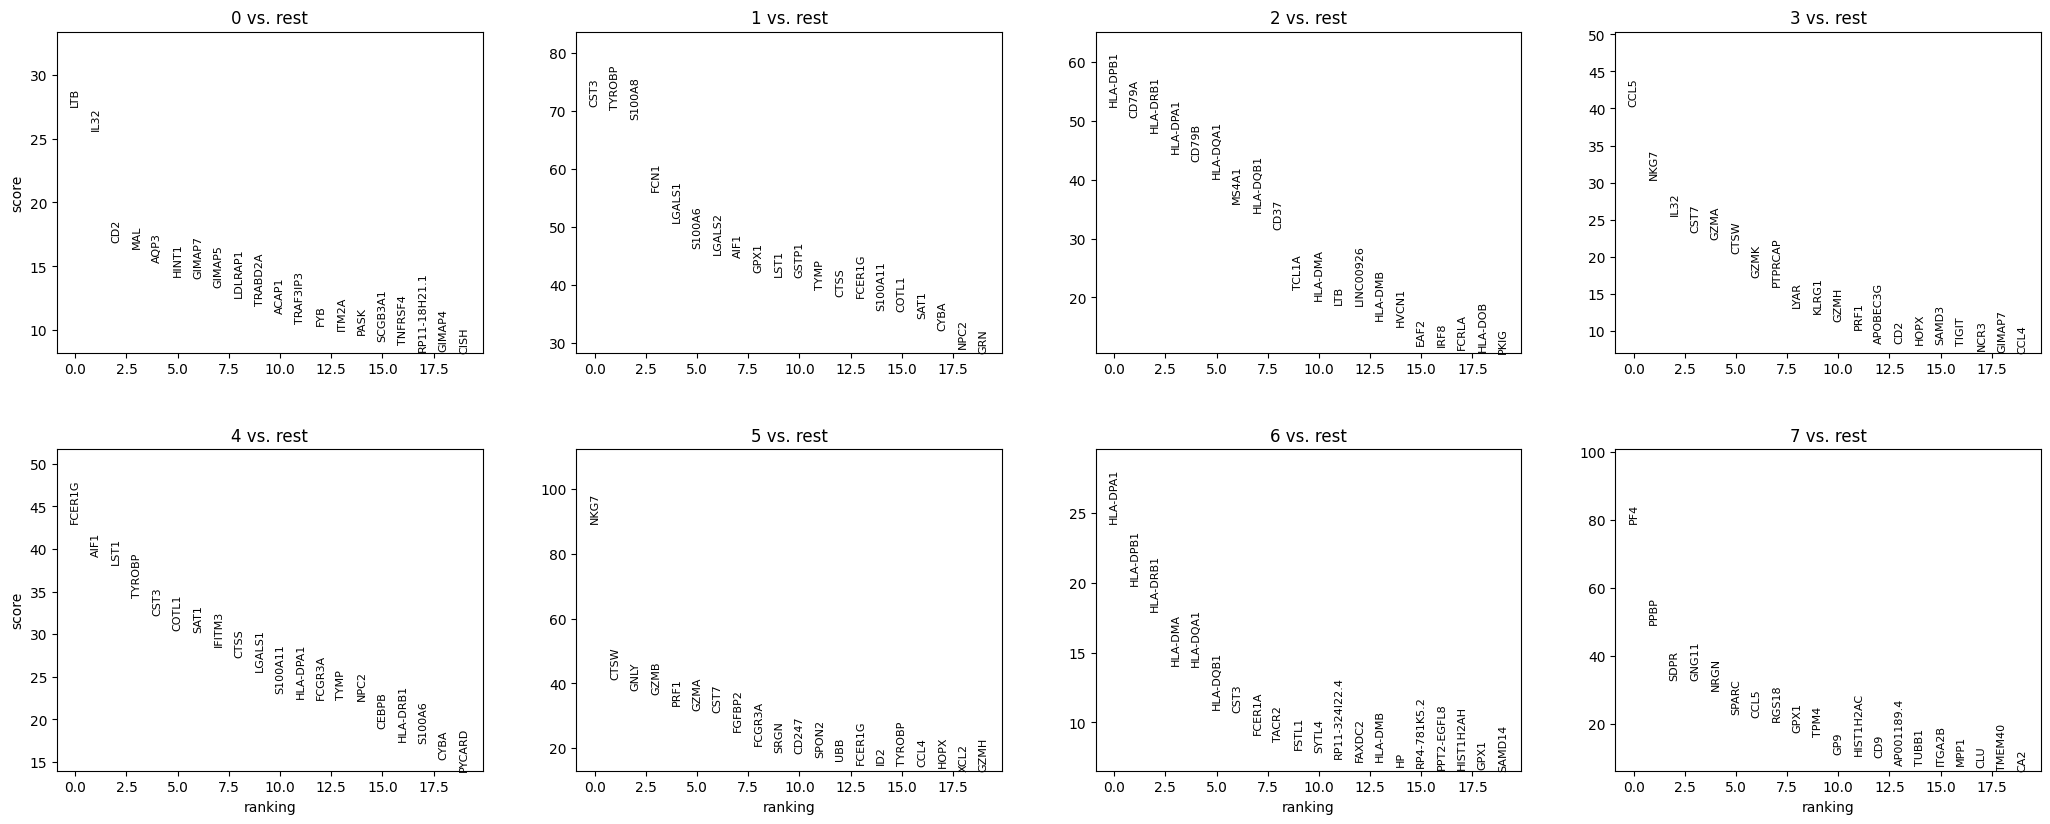

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)


imma justt google :\ the top three results

In [61]:
cluster_names = {
    '0': 'Immature NKT',
    '1': 'Mature NKT',
    '2': 'NK-like cells',
    '3': 'CD8+ T cells',
    '4': 'CD4+ T cells',
    '5': 'Activated NKT',
    '6': 'Double Negative T',
    '7': 'Cycling T cells'
}


In [62]:
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_names)


In [63]:
adata.obs['cell_type'] = adata.obs['leiden'].astype(str).map(cluster_names)




In [64]:
adata.obs['cell_type'] = adata.obs['leiden'].map(cluster_names)

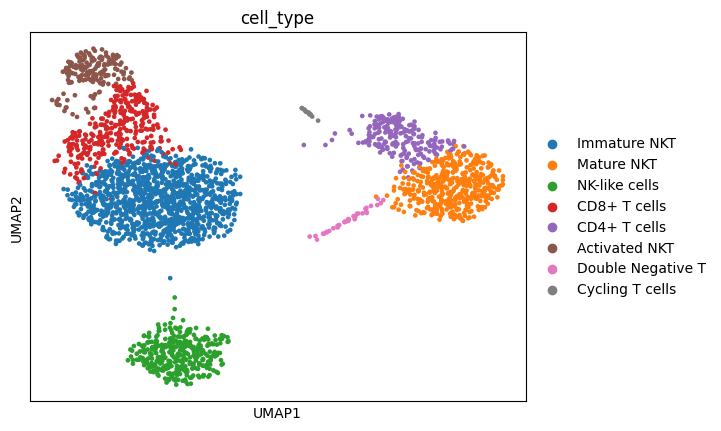

In [65]:
sc.pl.umap(adata, color='cell_type')


In [66]:
# Compute UMAP
sc.tl.umap(adata)

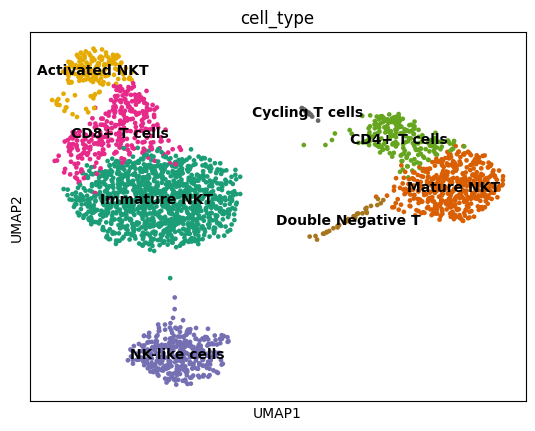

In [77]:
import seaborn as sns


sc.pl.umap(adata, color='cell_type', legend_loc='on data', palette=sns.color_palette("Dark2"))
